# Fitting Hurst parameter to capture mean-reversion or trending behaviour in time series. Application to simulated fractional Brownian motion.

In [1]:
import numpy as np
from ito_diffusions import *
from hurst_fitting import *
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.style.use('dark_background')

In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (11,18),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

In [3]:
T = 1.0
SCHEME_STEPS = 250
LAGS = 10
ONE_PCT = 1e-2

## Synthetic data : fractional Brownian motion

* $H=\frac{1}{2}$ : Brownian motion
* $H<\frac{1}{2}$ : mean-reverting, rougher sample paths
* $H>\frac{1}{2}$ : trend-following, smoother sample paths

/home/sauxpa/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/sauxpa/anaconda3/lib/python3.7/site-packages/hurst_fitting.py:43: RuntimeWarning: divide by zero encountered in power
  return 0.5*(np.abs(lag+1)**(2*H)+np.abs(lag-1)**(2*H)-2*np.abs(lag)**(2*H))
/home/sauxpa/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


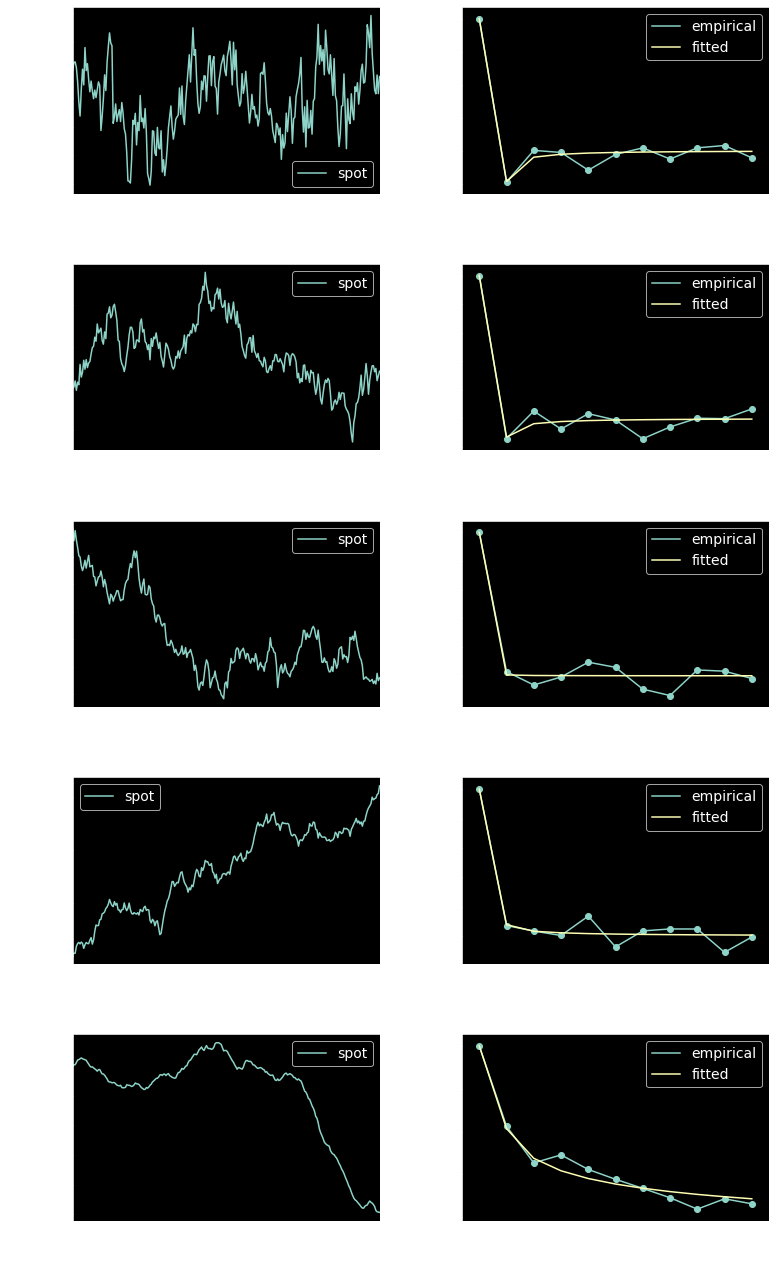

In [4]:
fig, axes = plt.subplots(nrows=5, ncols=2)

X = FBM(x0=100.0, T=T, scheme_steps=SCHEME_STEPS, drift=0.0, vol=1.0)
fitter = Hurst_fitter(n_lags=LAGS)

Hs = [0.3, 0.4, 0.5, 0.6, 0.9]

for i, ax_row in enumerate(axes):
    H = Hs[i]
    X.H = H
    df = X.simulate()
    
    # initialize Hurst fitter
    fitter.df = df
    H_fit = fitter.fit()
    
    ax = ax_row[0]
    df.plot(kind='line', ax=ax)
    ax.set_xlabel('time\nH={:.2f}'.format(H))
    ax.set_ylabel('spot')
    ax.legend()

    ax = ax_row[1]
    ys = acf(fitter.df_inc, nlags=LAGS)
    ys_fit = fitter.autocorr_frac_noise_range(H_fit)
    ax.plot(fitter.lag_range, ys, label='empirical')
    ax.scatter(fitter.lag_range, ys, marker='o')
    ax.plot(fitter.lag_range, ys_fit, label='fitted')
        
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    ax.set_xlabel('lag\nH={:.2f} (empirical) vs H={:.2f} (fitted) '.format(H, H_fit))
    ax.set_ylabel('autocorrelogram')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Less data

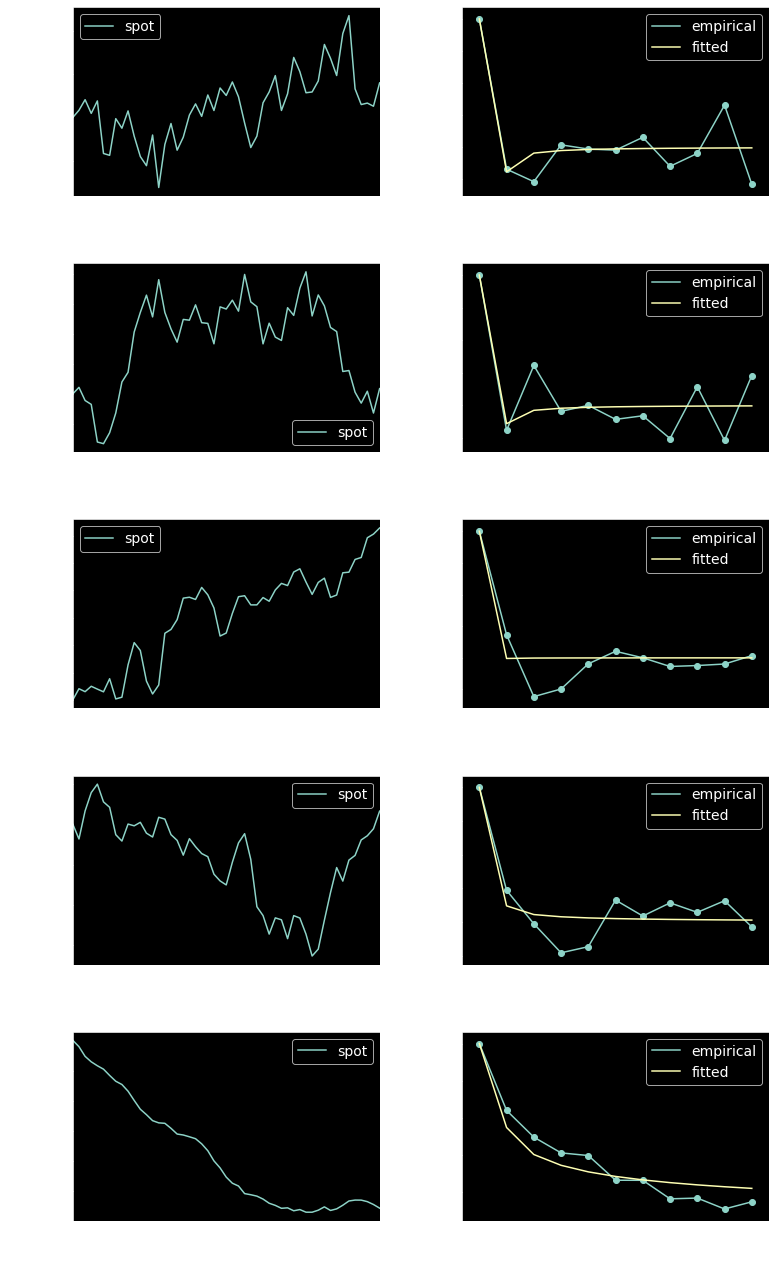

In [5]:
fig, axes = plt.subplots(nrows=5, ncols=2)

X = FBM(x0=100.0, T=T, scheme_steps=SCHEME_STEPS // 5, drift=0.0, vol=1.0)
fitter = Hurst_fitter(n_lags=LAGS)

Hs = [0.3, 0.4, 0.5, 0.6, 0.9]

for i, ax_row in enumerate(axes):
    H = Hs[i]
    X.H = H
    df = X.simulate()
    
    # initialize Hurst fitter
    fitter.df = df
    H_fit = fitter.fit()
    
    ax = ax_row[0]
    df.plot(kind='line', ax=ax)
    ax.set_xlabel('time\nH={:.2f}'.format(H))
    ax.set_ylabel('spot')
    ax.legend()

    ax = ax_row[1]
    ys = acf(fitter.df_inc, nlags=LAGS)
    ys_fit = fitter.autocorr_frac_noise_range(H_fit)
    ax.plot(fitter.lag_range, ys, label='empirical')
    ax.scatter(fitter.lag_range, ys, marker='o')
    ax.plot(fitter.lag_range, ys_fit, label='fitted')
        
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    ax.set_xlabel('lag\nH={:.2f} (empirical) vs H={:.2f} (fitted) '.format(H, H_fit))
    ax.set_ylabel('autocorrelogram')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

## More data

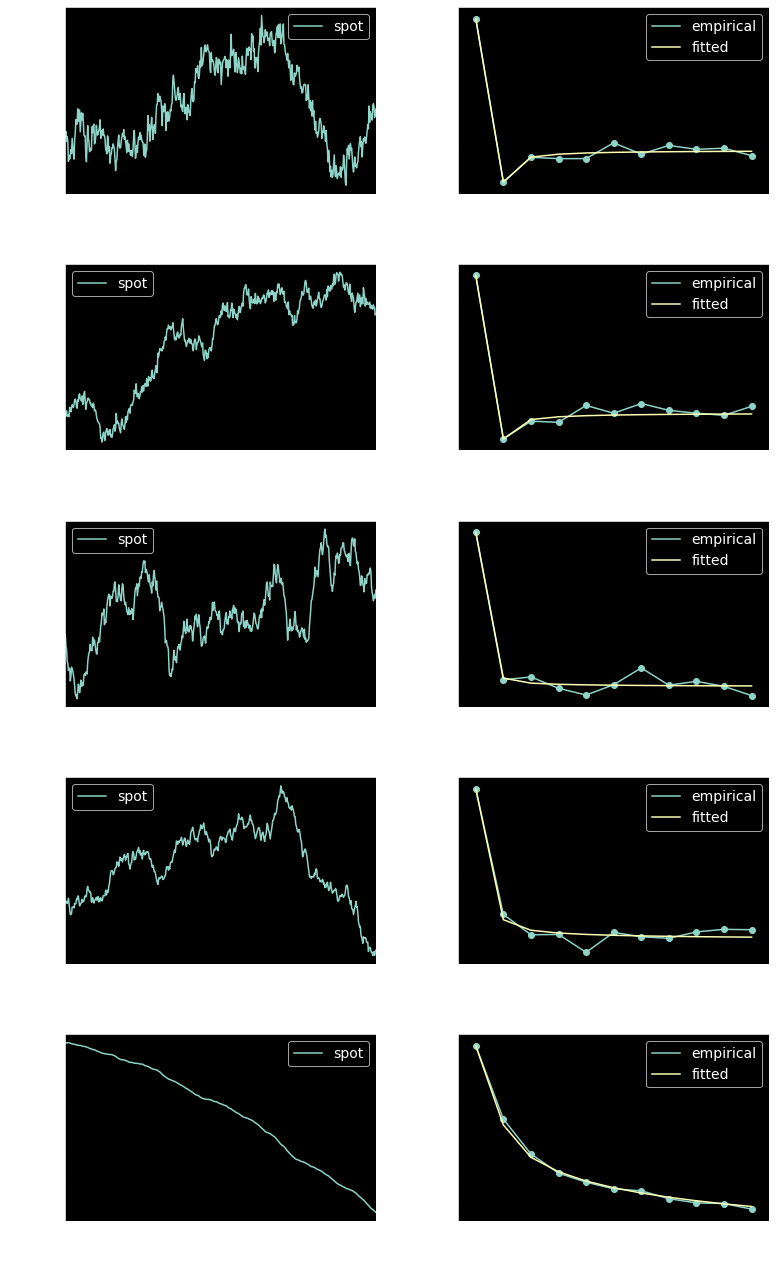

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=2)

X = FBM(x0=100.0, T=T, scheme_steps=SCHEME_STEPS * 2, drift=0.0, vol=1.0)
fitter = Hurst_fitter(n_lags=LAGS)

Hs = [0.3, 0.4, 0.5, 0.6, 0.9]

for i, ax_row in enumerate(axes):
    H = Hs[i]
    X.H = H
    df = X.simulate()
    
    # initialize Hurst fitter
    fitter.df = df
    H_fit = fitter.fit()
    
    ax = ax_row[0]
    df.plot(kind='line', ax=ax)
    ax.set_xlabel('time\nH={:.2f}'.format(H))
    ax.set_ylabel('spot')
    ax.legend()

    ax = ax_row[1]
    ys = acf(fitter.df_inc, nlags=LAGS)
    ys_fit = fitter.autocorr_frac_noise_range(H_fit)
    ax.plot(fitter.lag_range, ys, label='empirical')
    ax.scatter(fitter.lag_range, ys, marker='o')
    ax.plot(fitter.lag_range, ys_fit, label='fitted')
        
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    ax.set_xlabel('lag\nH={:.2f} (empirical) vs H={:.2f} (fitted) '.format(H, H_fit))
    ax.set_ylabel('autocorrelogram')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Convergence of the Hurst estimator with number of datapoints

In [7]:
H = 0.4
X = FBM(x0=100.0, T=T, drift=0.0, vol=1.0, H=H)
fitter = Hurst_fitter(n_lags=LAGS)

H_errors = []

scheme_steps = range(50, 1000, 25)
repetition = 50

for scheme_step in scheme_steps:
    X.scheme_steps = scheme_step
    H_err_avg = 0
    for _ in range(repetition):
        df = X.simulate()
        # initialize Hurst fitter
        fitter.df = df
        H_fit = fitter.fit()
        H_err_avg += H_fit - H
    H_err_avg /= repetition
    H_errors.append(H_err_avg)

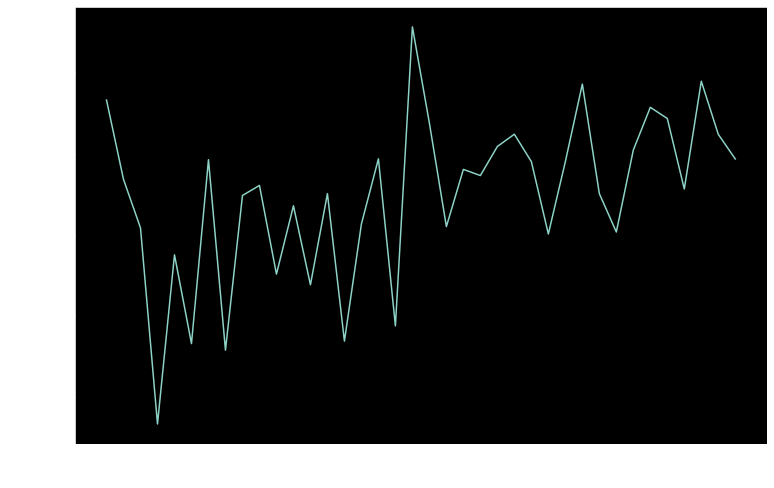

In [8]:
fig, ax = plt.subplots(figsize=(11,7), nrows=1, ncols=1)
ax.plot(scheme_steps, H_errors)
ax.set_xlabel('Data size')
ax.set_ylabel('Error')
plt.tight_layout()
plt.show()

## Stability over different sampling frequency

For fBM, the sampling frequency should not matter in the estimation of H as the same Hurst index applies regardless of the time scale (although it may vary due to statistical fluctuations depending on how many data points are used for the estimation).

That is typically not a property of real-world rough time series which tends to exhibit non auto-similar, or multi-fractal behaviour.

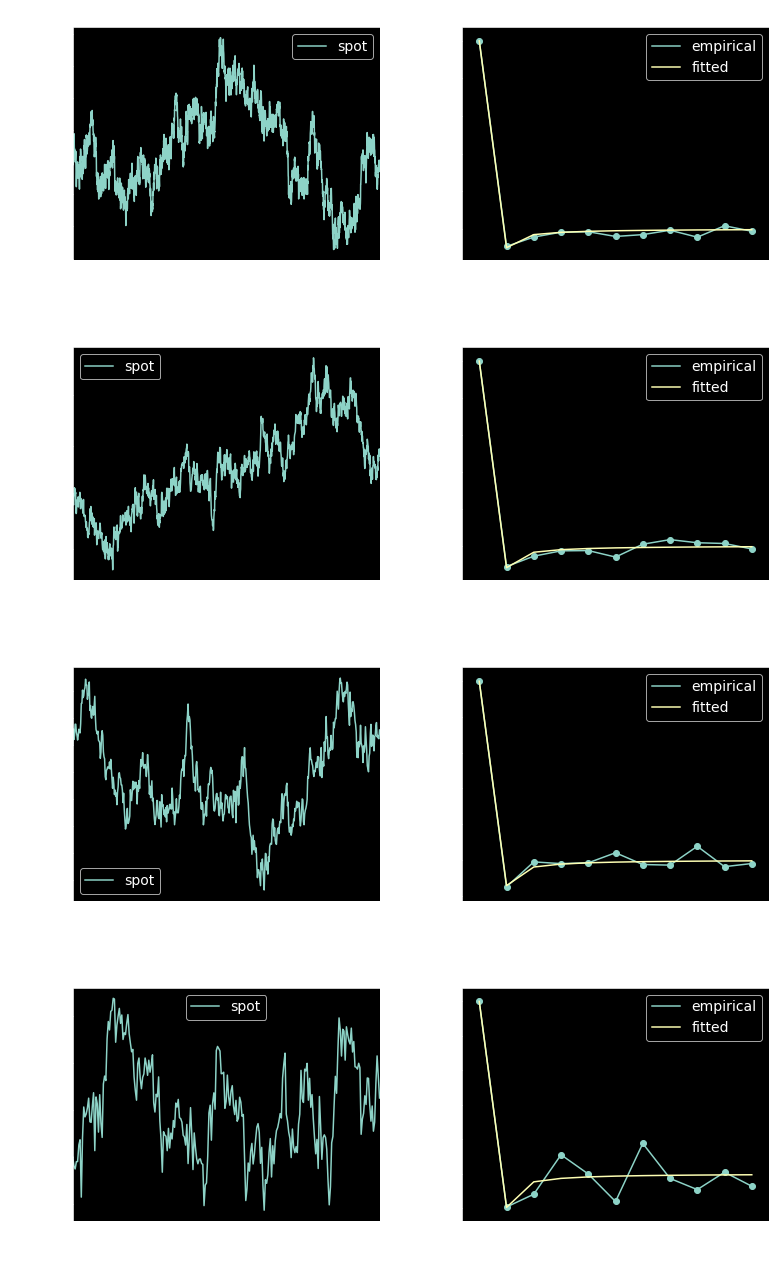

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=2)

H = 0.4

X = FBM(x0=100.0, T=T, scheme_steps=SCHEME_STEPS * 10, drift=0.0, vol=1.0, H=H)
fitter = Hurst_fitter(n_lags=LAGS)

freqs = [1, 2, 5, 10]

for i, ax_row in enumerate(axes):
    freq = freqs[i]
    df = X.simulate().iloc[::freq]
    
    # initialize Hurst fitter
    fitter.df = df
    H_fit = fitter.fit()
    
    ax = ax_row[0]
    df.plot(kind='line', ax=ax)
    ax.set_xlabel('time\nH={:.2f}'.format(H))
    ax.set_ylabel('spot')
    ax.set_title('Sampling frequency {}'.format(freq))
    ax.legend()

    ax = ax_row[1]
    ys = acf(fitter.df_inc, nlags=LAGS)
    ys_fit = fitter.autocorr_frac_noise_range(H_fit)
    ax.plot(fitter.lag_range, ys, label='empirical')
    ax.scatter(fitter.lag_range, ys, marker='o')
    ax.plot(fitter.lag_range, ys_fit, label='fitted')
        
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    ax.set_xlabel('lag\nH={:.2f} (empirical) vs H={:.2f} (fitted) '.format(H, H_fit))
    ax.set_ylabel('autocorrelogram')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()